In [1]:
import os.path as osp
import torch_geometric.transforms as T
from torch_geometric.datasets import TUDataset
import torch_geometric.utils as utils
import networkx as nx

dataset = 'PROTEINS'
path = osp.join(osp.dirname(osp.realpath("__file__")), '..', 'data', 'TUDataset')
transform = T.Compose([T.GCNNorm(), T.NormalizeFeatures()])
dataset = TUDataset(path, dataset, transform=transform)


In [5]:
def beam_subgraphs(data, selected_nodes = None, width = 3):
    subgraphs = []
    G = utils.to_networkx(data)
    method = nx.degree_centrality(G)
    if(not selected_nodes):
        traverse_list = range(data.x.shape[0])
    for source in traverse_list:
        res = nx.bfs_beam_edges(G, source, method.get, width)
        node_list = [source]
        for i,j in res:
            node_list.append(j)
        subgraph = G.subgraph(node_list)
        subgraphs.append(subgraph)
    return subgraphs


In [6]:
all_subgraphs = []
for data in dataset:
    all_subgraphs.append(beam_subgraphs(data))


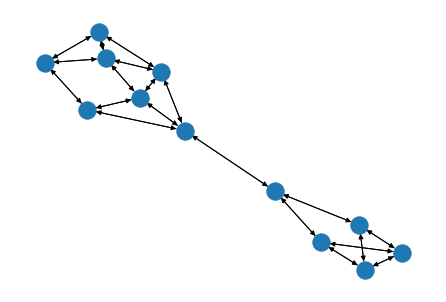

In [8]:
nx.draw(all_subgraphs[0][3])